In [34]:
import numpy as np 
import pandas as pd
from cvxpy import *
import matplotlib.pyplot as plt

from sklearn import svm

In [35]:
df = pd.read_csv('iris.csv')
df = df.sample(frac = 1)
df = df.drop(['sepal_width','petal_length'], axis = 1)

samples = len(df)
df['species'] = df['species'].mask(df['species'] != 'setosa',-1)
df['species'] = df['species'].mask(df['species'] == 'setosa',1)


# (0) Creating Hard SVM function 

In [36]:
#Q1(a) Creating the hard SVM function.
def hard_SVM(X1,X2,Y):
    w1 = Variable() 
    w2 = Variable()
    b = Variable()
    constraints = []
    samples = len(df)

    for i in range(samples):
        constraints += [
        Y[i]*(w1*X1[i]+w2*X2[i]+b)>=1
        ]
    objective = Minimize(w1**2 + w2**2)
    prob = Problem(objective, constraints)
    prob.solve()
    return constraints,w1,w2,b

In [37]:
def classes1(X1,X2,Y,dual_values): 
    X1_setosa = [] 
    X1_not_setosa = [] 
    X2_setosa = []
    X2_not_setosa = []
    X1_dual = []
    X2_dual = [] 

    for i in range(len(X1)): 
        if((Y[i] == 1) and dual_values[i] == 0): 
            X1_setosa.append(X1[i])
            X2_setosa.append(X2[i])
       
        
    
        elif((Y[i]==-1) and dual_values[i] == 0): 
            X1_not_setosa.append(X1[i])
            X2_not_setosa.append(X2[i])
        
    
        else: 
            X1_dual.append(X1[i])
            X2_dual.append(X2[i])
        
    return X1_setosa,X1_not_setosa,X2_setosa,X2_not_setosa,X1_dual,X2_dual
    

In [38]:
def classes2(X1,X2,Y):
    X1_setosa = [] 
    X1_not_setosa = [] 
    X2_setosa = []
    X2_not_setosa = []
   
    
    for i in range(len(X1)): 
        if((Y[i] == 1) and dual_values[i] == 0): 
            X1_setosa.append(X1[i])
            X2_setosa.append(X2[i])
       
        
    
        elif((Y[i]==-1) and dual_values[i] == 0): 
            X1_not_setosa.append(X1[i])
            X2_not_setosa.append(X2[i])
        
    
     
        
    return X1_setosa,X1_not_setosa,X2_setosa,X2_not_setosa
    

# (i) Solving optimization for IRIS 

In [29]:


X1 = df['sepal_length'].tolist()
X2 = df['petal_width'].tolist()
Y = df['species'].tolist()

constraints,w1,w2,b = hard_SVM(X1,X2,Y)
dual_values = []
for i in range(samples): 
    val = constraints[i].dual_value
    if(val>0.01):
        dual_values.append(val)
    else:
        dual_values.append(0)


# (ii)Displaying dual values.

In [30]:
#Q1(a)(ii)
print("the dual values are ",dual_values)

the dual values are  [0, 0, 0, 0, 0, 0, 0, 0, 0, 25.013104083552417, 0, 0, 0, 0.19509853807974062, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.326718659967334, 0, 0, 0, 1.162039085685233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.043830704661686495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09715274751621726, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.861480067645424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.326718659967334]


In [31]:

X1_setosa,X1_not_setosa,X2_setosa,X2_not_setosa,X1_dual,X2_dual = classes1(X1,X2,Y,dual_values)

# (iii)Scatter Plot of Support Vectors.

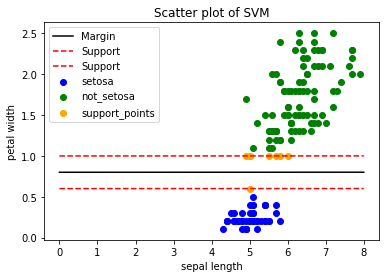

In [32]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,8,100)
y = (-b.value - w1.value*x)/w2.value
y1 =(-b.value - w1.value*x-1)/w2.value
y2 =(-b.value - w1.value*x+1)/w2.value
ax.plot(x,y,linestyle = '-',color = 'black')
ax.plot(x,y1,linestyle = '--',color = 'red')
ax.plot(x,y2,linestyle = '--',color = 'red')
plt.scatter(X1_setosa,X2_setosa,color = 'blue')
plt.scatter(X1_not_setosa,X2_not_setosa,color = 'green')
plt.scatter(X1_dual,X2_dual,color = 'orange')
plt.title('Scatter plot of SVM')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend(['Margin','Support','Support','setosa','not_setosa','support_points'])

# (iv) Plotting using Sklearn SVM

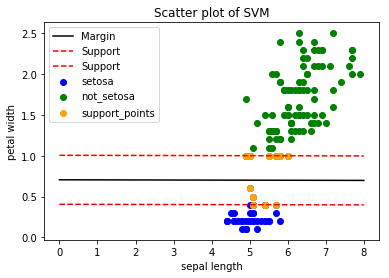

In [33]:


df = pd.read_csv('iris.csv')
df = df.sample(frac = 1)
df = df.drop(['sepal_width','petal_length'], axis = 1)

df['species'] = df['species'].mask(df['species'] != 'setosa',-1)
df['species'] = df['species'].mask(df['species'] == 'setosa',1)


X1 = df['sepal_length'].tolist()
X2 = df['petal_width'].tolist()
Y = df['species'].tolist()


X  = df[['sepal_length','petal_width']].values.tolist()
Y = df['species'].tolist()
clf = svm.SVC(kernel ='linear')


clf.fit(X,Y)
we1,we2 = clf.coef_[0][0],clf.coef_[0][1]
be = clf.intercept_[0]

support_vectors = [] 
for i in clf.support_vectors_: 
    support_vectors.append(i.tolist())
X1_setosa,X1_not_setosa,X2_setosa,X2_not_setosa = classes2(X1,X2,Y)

X2_dual = [] 
X1_dual = []
    
for i in range(len(X1)):
    val = [X1[i],X2[i]]
    if(val in support_vectors):
        X1_dual.append(X1[i])
        X2_dual.append(X2[i])
        
#Q1(a)(iii) Plotting the separating line in this case. Similar to one obtained earlier. 

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,8,100)
y = (-be - we1*x)/we2
y1 =(-be - we1*x-1)/we2
y2 =(-be - we1*x+1)/we2
ax.plot(x,y,linestyle = '-',color = 'black')
ax.plot(x,y1,linestyle = '--',color = 'red')
ax.plot(x,y2,linestyle = '--',color = 'red')
plt.scatter(X1_setosa,X2_setosa,color = 'blue')
plt.scatter(X1_not_setosa,X2_not_setosa,color = 'green')
plt.scatter(X1_dual,X2_dual,color = 'orange')
plt.title('Scatter plot of SVM')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend(['Margin','Support','Support','setosa','not_setosa','support_points'])